In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-purchases-behaviour-dataset/customer_data.csv


In [2]:
#Membaca dataset menggunakan pandas dataframe
dataframe = pd.read_csv("/kaggle/input/customer-purchases-behaviour-dataset/customer_data.csv")
dataframe.head() #Menampilkan 5 data teratas

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


DATA PREPROCESSING

In [3]:
#Menampilkan dimensi dataframe
dataframe.shape

(100000, 12)

Data terdiri dari 100.000 baris dan 12 kolom

In [4]:
#Menampilkan tipe data untuk setiap kolom
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [5]:
#Mengecek missing value
dataframe.isnull().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [6]:
#Mengecek duplikasi
dataframe.duplicated().sum()

0

In [7]:
#Menghapus kolom id (tidak diperlukan)
dataframe.drop(columns=["id"],inplace=True)

In [8]:
#Mengecek unique value dari kolom gender
dataframe["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Menggunakan LabelEncoder untuk kolom 'Gender'
dataframe['Gender_Encoded'] = label_encoder.fit_transform(dataframe['gender'])

# Menghapus kolom 'Gender' yang lama
dataframe.drop('gender', axis=1, inplace=True)

In [10]:
#Menamampilkan ulang data setelah preprocessing
dataframe.head()

,age,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,Gender_Encoded
0,27,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,1
1,29,15317,Masters,West,Regular,rare,4557,Clothing,1,6,1
2,37,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6,1
3,30,11568,HighSchool,South,Regular,frequent,4098,Food,0,7,1
4,31,46952,College,North,Regular,occasional,19685,Clothing,1,5,0


EXPLORATORY DATA ANALYSIS

In [11]:
#Mengecek deskripsi data
dataframe.describe()

,age,income,purchase_amount,promotion_usage,satisfaction_score,Gender_Encoded
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,30.003260,27516.269880,9634.790840,0.300800,5.009650,0.499260
std,4.480535,12996.782587,4799.339449,0.458608,1.038714,0.500002
min,12.000000,5000.000000,1118.000000,0.000000,0.000000,0.000000
25%,27.000000,16271.750000,5583.000000,0.000000,4.000000,0.000000
50%,30.000000,27584.500000,9452.000000,0.000000,5.000000,0.000000
75%,33.000000,38747.250000,13350.000000,1.000000,6.000000,1.000000
max,49.000000,50000.000000,26204.000000,1.000000,10.000000,1.000000


PERTANYAAN BISNIS 1: Berapa Komposisi antara pembeli Laki-laki dan Perempuan

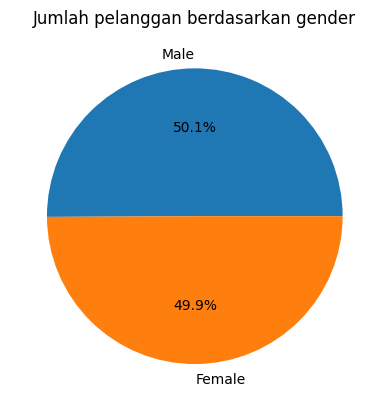

In [14]:
import matplotlib.pyplot as plt
gender=dataframe['Gender_Encoded'].value_counts()
plt.pie(gender,autopct='%1.1f%%',labels=['Male','Female'])
plt.title('Jumlah pelanggan berdasarkan gender')
plt.show()

PERTANYAAN BISNIS 2: Berapa Komposisi pembeli berdasarkan tingkat pendidikanya

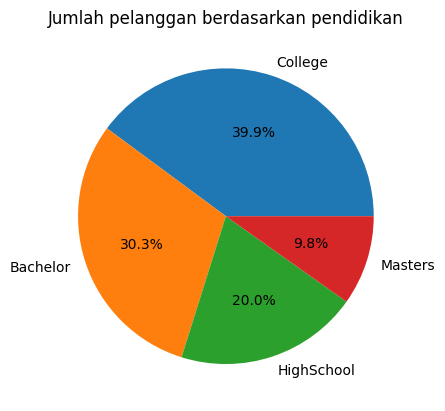

In [13]:
education=dataframe['education'].value_counts()
plt.pie(education,autopct='%1.1f%%',labels=['College','Bachelor','HighSchool','Masters'])
plt.title('Jumlah pelanggan berdasarkan pendidikan')
plt.show()

PERTANYAAN BISNIS 3: Berapa Komposisi pembeli berdasarkan wilayah (region)

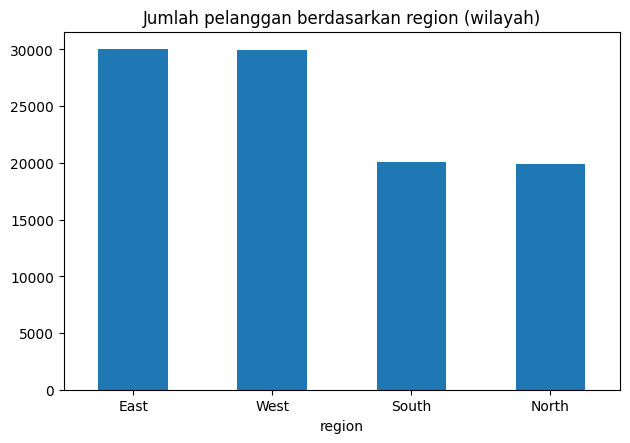

In [14]:
dataframe['region'].value_counts().plot(kind='bar')
plt.title('Jumlah pelanggan berdasarkan region (wilayah)')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

PERTANYAAN BISNIS 4: Bagaimana loyalty status tiap wilayah

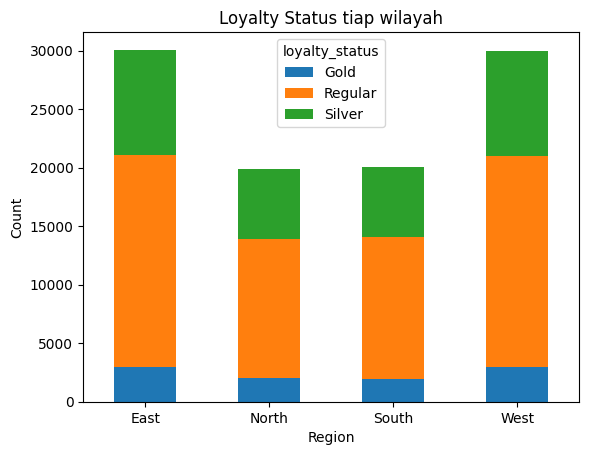

In [15]:
loyalty_status_counts = dataframe.groupby(['region', 'loyalty_status'])['loyalty_status'].size()
loyalty_status_counts
loyalty_status_counts.unstack().plot(kind='bar', stacked=True)
plt.title('Loyalty Status tiap wilayah')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='loyalty_status')
plt.xticks(rotation=0)

# Show plot
plt.show()

PERTANYAAN BISNIS 5: Produk apa dengan jumlah penjualan tertinggi

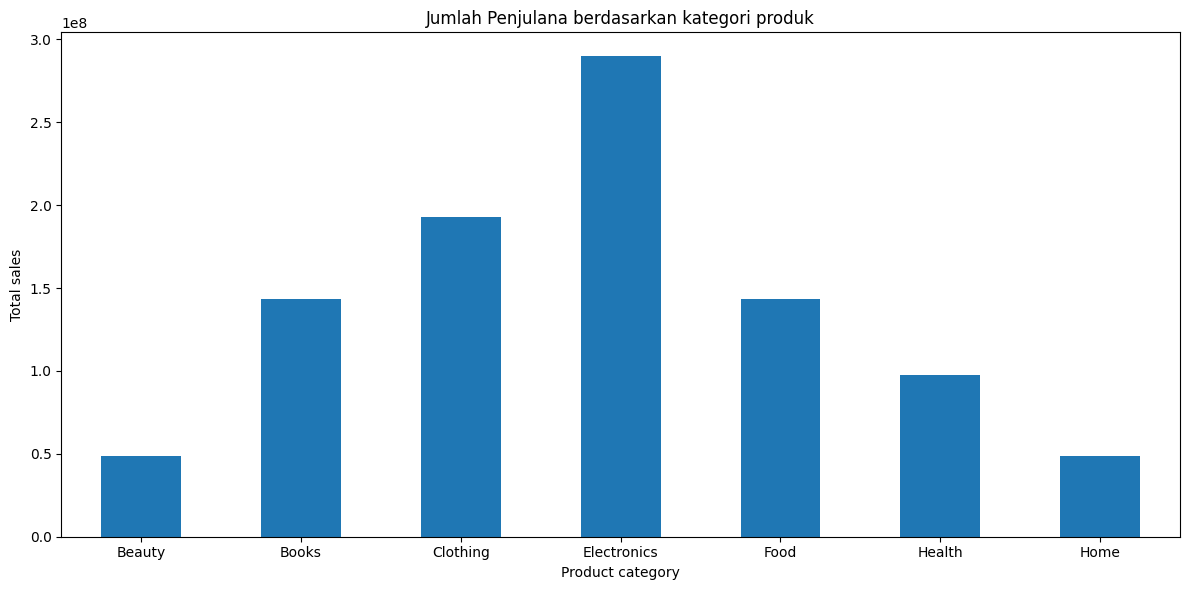

In [16]:
plt.figure(figsize=(12,6))
dataframe.groupby('product_category')['purchase_amount'].sum().plot(kind='bar')
plt.title('Jumlah Penjulana berdasarkan kategori produk')
plt.xlabel('Product category')
plt.ylabel('Total sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

PERTANYAAN BISNIS 6: Jenis Produk yang dibeli berdasarkan gender

In [21]:
loyalty_status_counts = dataframe.groupby(['Gender_Encoded', 'product_category'])['product_category'].size()
loyalty_status_counts

Gender_Encoded  product_category
0               Beauty               2463
                Books                7432
                Clothing            10059
                Electronics         15077
                Food                 7461
                Health               5058
                Home                 2524
1               Beauty               2572
                Books                7493
                Clothing             9930
                Electronics         14950
                Food                 7361
                Health               5065
                Home                 2555
Name: product_category, dtype: int64

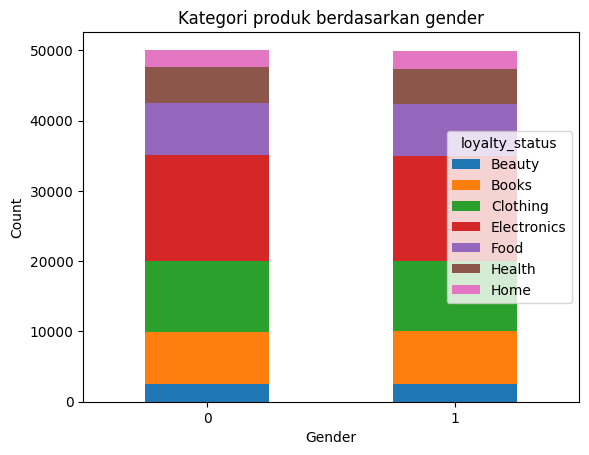

In [22]:
loyalty_status_counts.unstack().plot(kind='bar', stacked=True)
plt.title('Kategori produk berdasarkan gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='loyalty_status')
plt.xticks(rotation=0)

# Show plot
plt.show()

PERTANYAAN BISNIS 7: Kategori produk apa dengan tingkat satisfaction score tertinggi

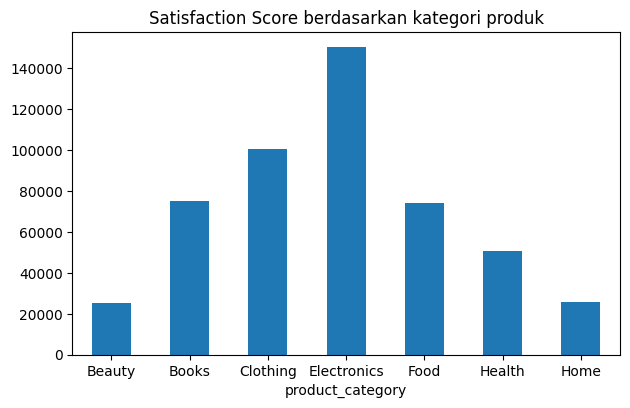

In [28]:
dataframe.groupby('product_category')['satisfaction_score'].sum().plot(kind='bar')
plt.title('Satisfaction Score berdasarkan kategori produk')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

PERTANYAAN BISNIS 8: Bagaimana Distribusi pembelian berdasarkan pendapatan

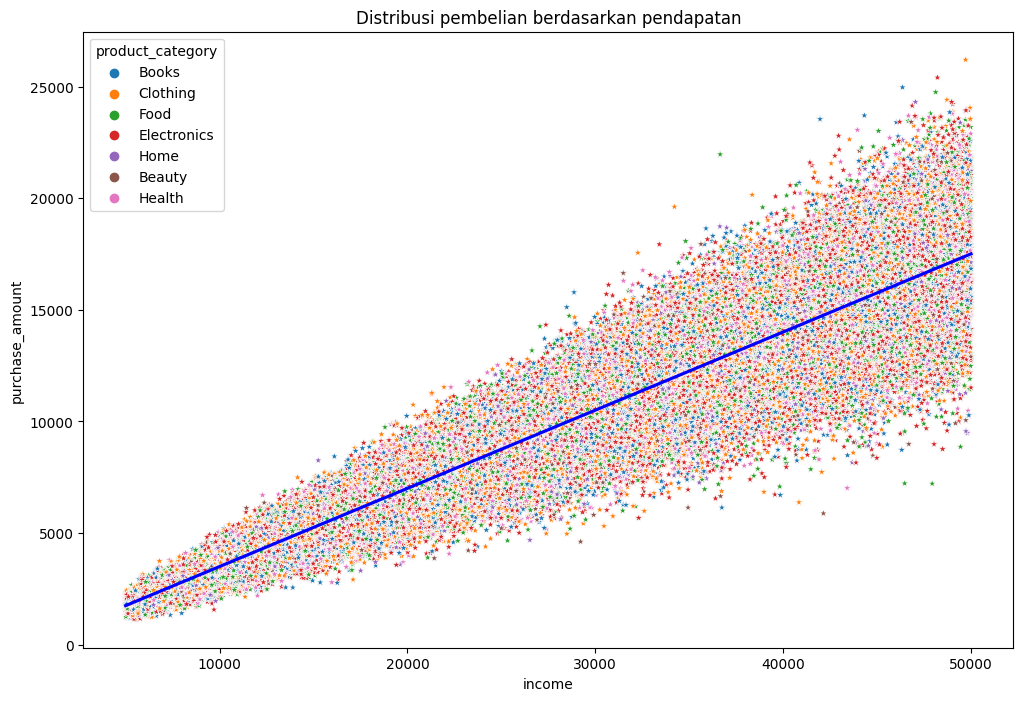

In [17]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(data=dataframe,x='income',y='purchase_amount', hue='product_category', marker='*')
sns.regplot(data=dataframe, x='income', y='purchase_amount', scatter=False, color='blue')
plt.title('Distribusi pembelian berdasarkan pendapatan')
plt.show()

In [32]:
columns_to_encode = ['education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category']  # List of columns to encode

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    dataframe[column] = label_encoder.fit_transform(dataframe[column])

In [33]:
dataframe.head()

,age,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,Gender_Encoded
0,27,40682,0,0,0,0,18249,1,0,6,1
1,29,15317,3,3,1,2,4557,2,1,6,1
2,37,38849,0,3,2,2,11822,2,0,6,1
3,30,11568,2,2,1,0,4098,4,0,7,1
4,31,46952,1,1,1,1,19685,2,1,5,0


PERTANYAAN BISNIS 9: Bagaimana korelasi antar tiap kolom

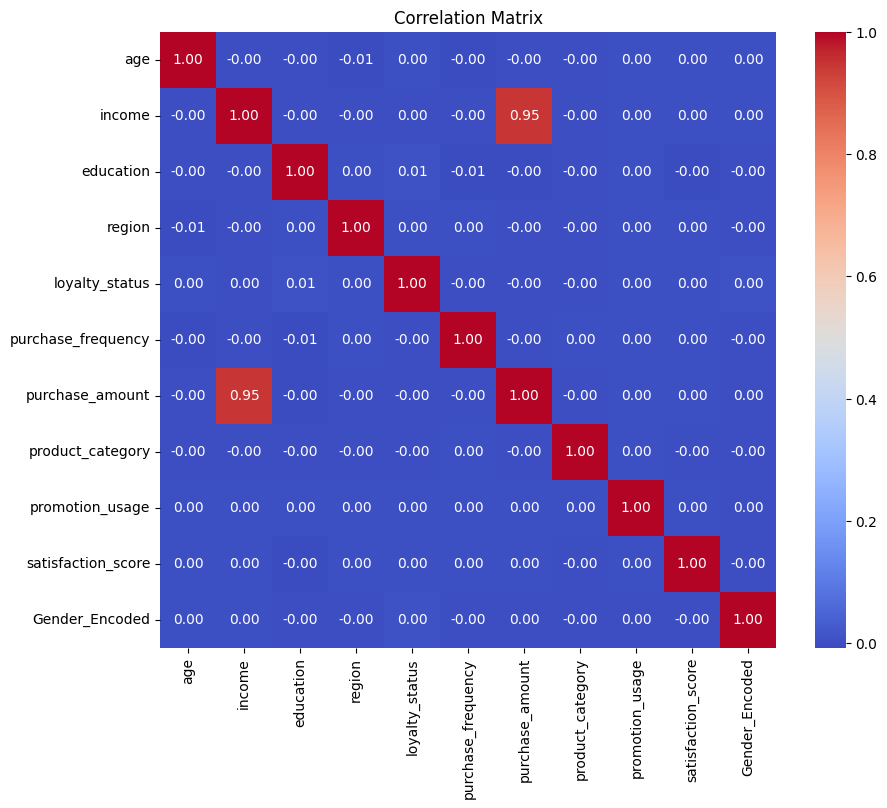

In [35]:
correlation_matrix = dataframe.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()2q1  

PERFORM SIMPLE LINEAR REGRESSION

In [46]:
from sklearn.linear_model import LinearRegression
X = dataframe['income'].values.reshape(-1, 1)
y = dataframe['purchase_amount'].values.reshape(-1, 1)

In [47]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your features and 'y' contains your target variable
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (80000, 1) (80000, 1)
Testing set shape (X, y): (20000, 1) (20000, 1)


In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
koefisein = model.coef_
intercept = model.intercept_
print(koefisein, intercept)

[[0.35017015]] [-1.51891335]


In [57]:
y_topi = model.predict(X_test)

In [58]:
model.score(X_test, y_test)

0.8980430941778186

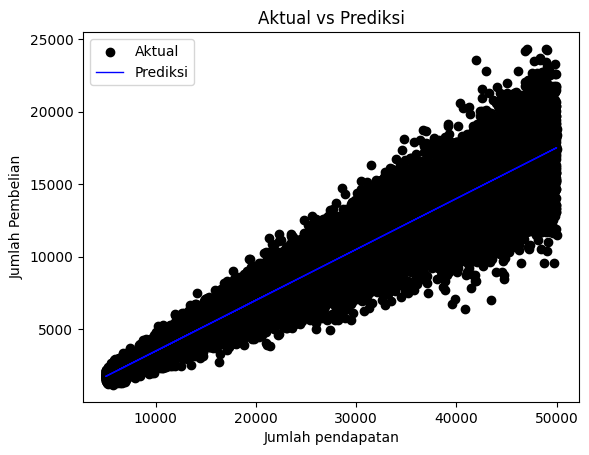

In [63]:
plt.scatter(X_test, y_test, color="black", label="Aktual")

# Plot the linear regression line
plt.plot(X_test, y_topi, color="blue", linewidth=1, label="Prediksi")

plt.xlabel('Jumlah pendapatan')
plt.ylabel('Jumlah Pembelian')
plt.title('Aktual vs Prediksi')
plt.legend()
plt.show()